In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score


In [14]:
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal", "Fraud"]

In [15]:
dataset = pd.read_csv("creditcard.csv")
print("Any nulls in the dataset", dataset.isnull().values.any())
print("Label values", dataset['Class'].unique())


Any nulls in the dataset False
Label values [0 1]


/var/folders/gx/wnn6g1zj2l34xj09st_d176r0000gn/T/ipykernel_44092/3819715063.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'], sort=True)


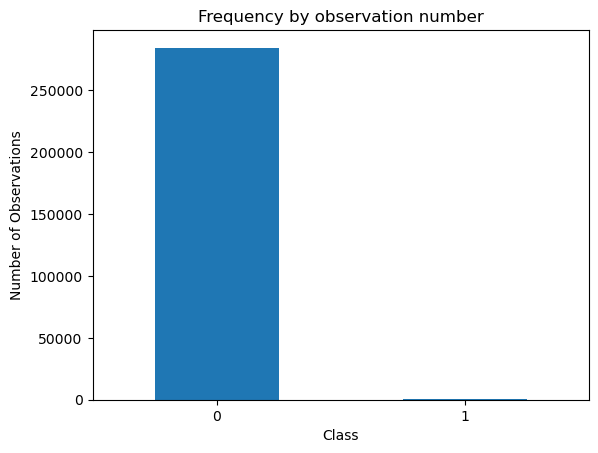

In [16]:
count_classes = pd.value_counts(dataset['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.show()


In [17]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))


In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(
    dataset.drop(columns='Class').values,
    dataset['Class'].values,
    test_size=0.3,
    random_state=RANDOM_SEED
)


In [19]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)


In [20]:
input_layer = tf.keras.layers.Input(shape=(train_data.shape[1],))
encoder = tf.keras.layers.Dense(14, activation="tanh")(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(7, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(4, activation=tf.nn.leaky_relu)(encoder)
decoder = tf.keras.layers.Dense(7, activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(14, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(train_data.shape[1], activation='tanh')(decoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_8 (Dense)             (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_9 (Dense)             (None, 7)                 105       
                                                                 
 dense_10 (Dense)            (None, 4)                 32        
                                                                 
 dense_11 (Dense)            (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0   

In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=64,
    validation_data=(test_data, test_data),
    shuffle=True,
    callbacks=[early_stop]
)




Epoch 1/50


2024-10-27 20:32:18.682163: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3116/3116 [==============================] - 3s 733us/step - loss: 0.0043 - accuracy: 0.0342 - val_loss: 1.9889e-05 - val_accuracy: 0.0250
Epoch 2/50
3116/3116 [==============================] - 2s 684us/step - loss: 2.0244e-05 - accuracy: 0.0551 - val_loss: 2.0047e-05 - val_accuracy: 6.3200e-04
Epoch 3/50
3116/3116 [==============================] - 2s 687us/step - loss: 2.0299e-05 - accuracy: 0.0634 - val_loss: 2.0318e-05 - val_accuracy: 0.1267
Epoch 4/50
3116/3116 [==============================] - 2s 652us/step - loss: 2.0425e-05 - accuracy: 0.0631 - val_loss: 2.0551e-05 - val_accuracy: 0.0417
Epoch 5/50
3116/3116 [==============================] - 2s 705us/step - loss: 2.0414e-05 - accuracy: 0.0593 - val_loss: 2.0642e-05 - val_accuracy: 0.2177
Epoch 6/50
3116/3116 [==============================] - 2s 706us/step - loss: 2.0427e-05 - accuracy: 0.0606 - val_loss: 2.0391e-05 - val_accuracy: 0.2177
Epoch 7/50
3116/3116 [==============================] - 2s 685us/step - loss: 2.0419e-0

In [10]:
# Encoder
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
encoder = tf.keras.layers.Dense(8, activation="relu")(encoder)

# Step 4: Decoder - Convert Latent Representation Back to Original Input
decoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(encoder)
decoder = tf.keras.layers.Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder Model
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 16)                496       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 30)                510       
                                                                 
Total params: 1,286
Trainable params: 1,286
Non-trainable params: 0
_________________________________________________________________


In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(
    train_data, train_data,
    epochs=50,
    batch_size=64,
    validation_data=(test_data, test_data),
    shuffle=True,
    callbacks=[early_stop]
)


Epoch 1/50
3116/3116 [==============================] - 2s 736us/step - loss: 2.0443e-05 - accuracy: 0.0591 - val_loss: 2.0299e-05 - val_accuracy: 0.0264
Epoch 2/50
3116/3116 [==============================] - 2s 687us/step - loss: 2.0421e-05 - accuracy: 0.0621 - val_loss: 2.0415e-05 - val_accuracy: 0.2177
Epoch 3/50
3116/3116 [==============================] - 2s 678us/step - loss: 2.0409e-05 - accuracy: 0.0571 - val_loss: 2.1907e-05 - val_accuracy: 0.0250
Epoch 4/50
3116/3116 [==============================] - 2s 704us/step - loss: 2.0421e-05 - accuracy: 0.0599 - val_loss: 2.0967e-05 - val_accuracy: 0.0110
Epoch 5/50
3116/3116 [==============================] - 2s 694us/step - loss: 2.0408e-05 - accuracy: 0.0570 - val_loss: 2.0306e-05 - val_accuracy: 0.0110
Epoch 6/50
3116/3116 [==============================] - 2s 696us/step - loss: 2.0390e-05 - accuracy: 0.0594 - val_loss: 2.0608e-05 - val_accuracy: 0.0810
Epoch 7/50
3116/3116 [==============================] - 2s 686us/step - loss

In [23]:
test_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': test_labels})


2671/2671 [==============================] - 1s 272us/step


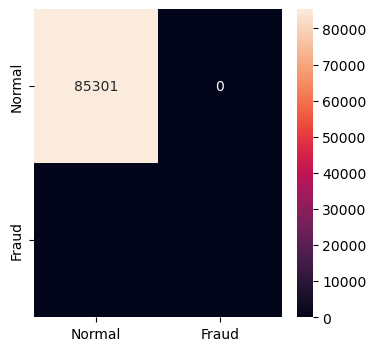

Accuracy: 0.99833807333544
Recall: 0.0
Precision: 0.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
threshold_fixed = 50  # Define an appropriate threshold
predictions = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] = predictions

conf_matrix = confusion_matrix(error_df.True_class, predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.show()
print("Accuracy:", accuracy_score(error_df.True_class, predictions))
print("Recall:", recall_score(error_df.True_class, predictions))
print("Precision:", precision_score(error_df.True_class, predictions))
